In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import scipy.stats as stats

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

mpl.rc('font',family='Malgun Gothic')

/tmp/ipykernel_5135/903351187.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
df2 = pd.read_csv('/home/piai/바탕화면/간편식 데이터/Cooking_Data.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24056 entries, 0 to 24055
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      24056 non-null  int64  
 1   생산라인코드  24056 non-null  object 
 2   생산라인명   24056 non-null  object 
 3   품목코드    24018 non-null  object 
 4   품목명     23999 non-null  object 
 5   작업장코드   24056 non-null  object 
 6   충전실온도   24056 non-null  float64
 7   실링온도    24028 non-null  float64
 8   쿠킹온도    24028 non-null  float64
 9   쿠킹스팀압력  24056 non-null  float64
 10  실링압력    24056 non-null  float64
 11  생산시간    22982 non-null  float64
 12  생산일자    24056 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 2.4+ MB


In [5]:
df3 = pd.read_csv('/home/piai/바탕화면/간편식 데이터/Error_Message.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   순번             1074 non-null   int64 
 1   생산라인코드         1074 non-null   object
 2   생산라인명          1074 non-null   object
 3   품목코드           1072 non-null   object
 4   품목명            1071 non-null   object
 5   발생시간           1074 non-null   object
 6   종료시간           1074 non-null   object
 7   오류조치시간         1074 non-null   int64 
 8   비가동코드          1074 non-null   object
 9   Error_Message  1074 non-null   object
 10  오류발생작업장명       1074 non-null   object
 11  생산일자           1074 non-null   object
dtypes: int64(2), object(10)
memory usage: 100.8+ KB


In [6]:
df2['ID'] = df2['생산일자'] + df2['품목코드'] + df2['생산라인코드'] + df2['순번'].astype(str)
df3['ID'] = df3['생산일자'] + df3['품목코드'] + df3['생산라인코드'] + df3['순번'].astype(str)

In [7]:
df2_1 = df2.drop(columns=['순번', '생산라인코드', '생산라인명', '생산일자','품목코드', '작업장코드','품목명'])

In [8]:
df_error = pd.merge(df3, df2_1, how='left', on='ID')
df_error.head(3)

,순번,생산라인코드,생산라인명,품목코드,품목명,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,생산일자,ID,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,10,D004,PET병,13D02080,참깨흑임자드레싱,14:16,14:24,8,W0056B4,위치조정실패,충전실,2021-01-03,2021-01-0313D02080D00410,71.125831,93.425831,127.878281,22.968,201.430,NaN
1,7,D011,2동 오리히로,16A01016,시아스고구마샐러드믹스,18:54,19:03,9,W005711,대기,충전실,2021-01-04,2021-01-0416A01016D0117,71.587470,103.987470,138.736120,23.166,204.974,NaN
2,2,C002,쿠커 #2,23K01321,나가사키베이스(재),9:51,9:58,7,W003452,충진 오류,쿠킹실,2021-01-05,2021-01-0523K01321C0022,70.540995,102.440995,137.135195,23.129,204.249,NaN


In [9]:
df_error['불량수'] = 1 

In [10]:
df_error_product = df_error.pivot_table(index='품목명',values='불량수',aggfunc='sum').reset_index()
df_error_product.sort_values(by='불량수',ascending=False).head(10)

,품목명,불량수
103,게살볶음밥E,16
472,참깨흑임자드레싱,15
130,김치볶음밥-S,15
270,비비고깍두기볶음밥200g(재),13
281,비비고불고기비빔밥200g,12
119,골드마요네즈3.2kg,11
269,비비고깍두기볶음밥200g,11
284,비비고새우볶음밥210g(알밥),10
245,미스터피자피자소스엠피(재),9
336,쉐프솔루션베이스볶음밥(시즌)500g,9


In [11]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '볶음밥' in row:
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '취나물밥' in row :
        return 'rice'
    elif '곤드레밥' in row :
        return 'rice'
    else:
        return 'ect'
    
df_error['구분'] = df_error['품목명'].apply(func1)
df_error['구분'].value_counts()

ect     700
rice    373
Name: 구분, dtype: int64

In [12]:
cond1 = (df_error['구분']=='rice')
df_error_rice = df_error.loc[cond1]
df_error_rice.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,...,생산일자,ID,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,불량수,구분
393,1,C001,쿠커 #1,21501131,조미유-쉐프솔루션베이스볶음밥(시즌)(재),14:00,15:37,97,W003325,기타,...,2018-11-14,2018-11-1421501131C0011,72.804711,94.104711,128.768211,23.109,198.567,NaN,1,rice
411,8,D088,냉동밥 내포장#1,1BA03069,CJ낙지볶음밥*5ea,13:40,13:50,10,W005211,PSD패킹 교체,...,2017-02-16,2017-02-161BA03069D0888,72.379567,123.479567,158.026317,23.031,198.681,NaN,1,rice
412,7,P022,냉동밥 외포장#2,1BA03158,비비고불고기비빔밥200g,12:30,13:00,30,W007461,기기세팅,...,2017-02-16,2017-02-161BA03158P0227,69.081732,78.881732,113.304632,22.949,204.408,NaN,1,rice
414,15,C088,냉동밥 취반#1,2BA03056,야채볶음밥베이스3kg(재),10:54,12:01,67,W0034B1,공정 과부하,...,2017-03-03,2017-03-032BA03056C08815,68.714462,79.214462,113.540962,22.884,198.796,NaN,1,rice
415,24,C088,냉동밥 취반#1,2BA03047,시아스야채볶음밥3kg(재),21:40,22:35,55,W0034B1,공정 과부하,...,2017-03-03,2017-03-032BA03047C08824,69.565660,80.665660,115.224060,23.039,196.889,NaN,1,rice


In [13]:
df_error_rice_pivot = df_error_rice.pivot_table(index='Error_Message',
                                                values='불량수',aggfunc='sum').reset_index()

In [14]:
df_error_rice_pivot['발생비율'] = df_error_rice_pivot['불량수'] / df_error_rice_pivot['불량수'].sum()
df_error_rice_pivot  = df_error_rice_pivot.sort_values(by='발생비율', ascending=False)
df_error_rice_pivot['누적발생비율'] = df_error_rice_pivot['발생비율'].cumsum()

In [15]:
df_error_rice_pivot

,Error_Message,불량수,발생비율,누적발생비율
1,공정 과부하,270,0.723861,0.723861
10,장비 오염,52,0.139410,0.863271
12,충진 오류,18,0.048257,0.911528
4,기타,11,0.029491,0.941019
5,별도구작업,7,0.018767,0.959786
6,볶음,6,0.016086,0.975871
9,원료,2,0.005362,0.981233
0,PSD패킹 교체,1,0.002681,0.983914
2,구동부 이상,1,0.002681,0.986595
3,기기세팅,1,0.002681,0.989276


In [16]:
df_error_rice_pivot['Line']= 0.8

<AxesSubplot:xlabel='Error_Message', ylabel='불량수'>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANG

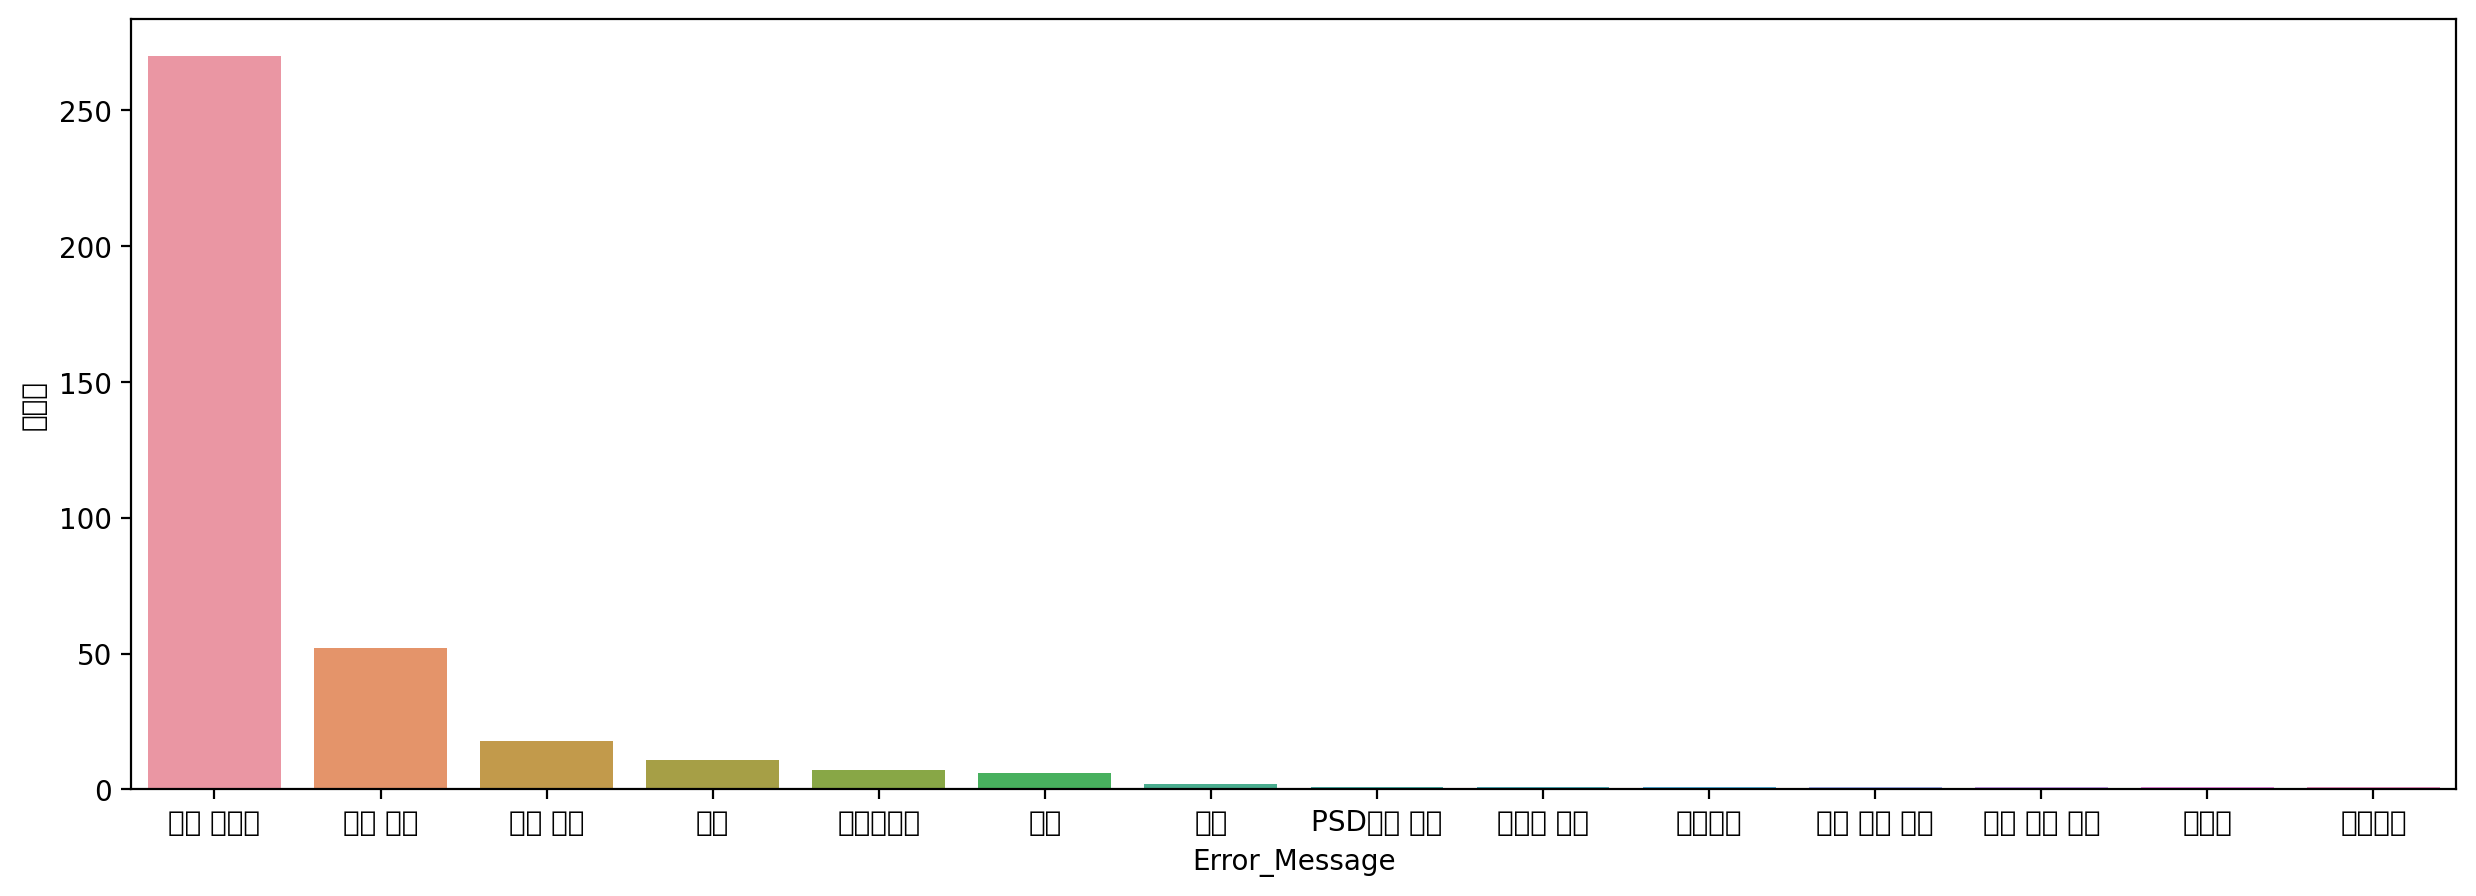

In [17]:
plt.figure(figsize=[15,5])
sns.barplot(data=df_error_rice_pivot, x='Error_Message',y='불량수')

<AxesSubplot:xlabel='Error_Message', ylabel='누적발생비율'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

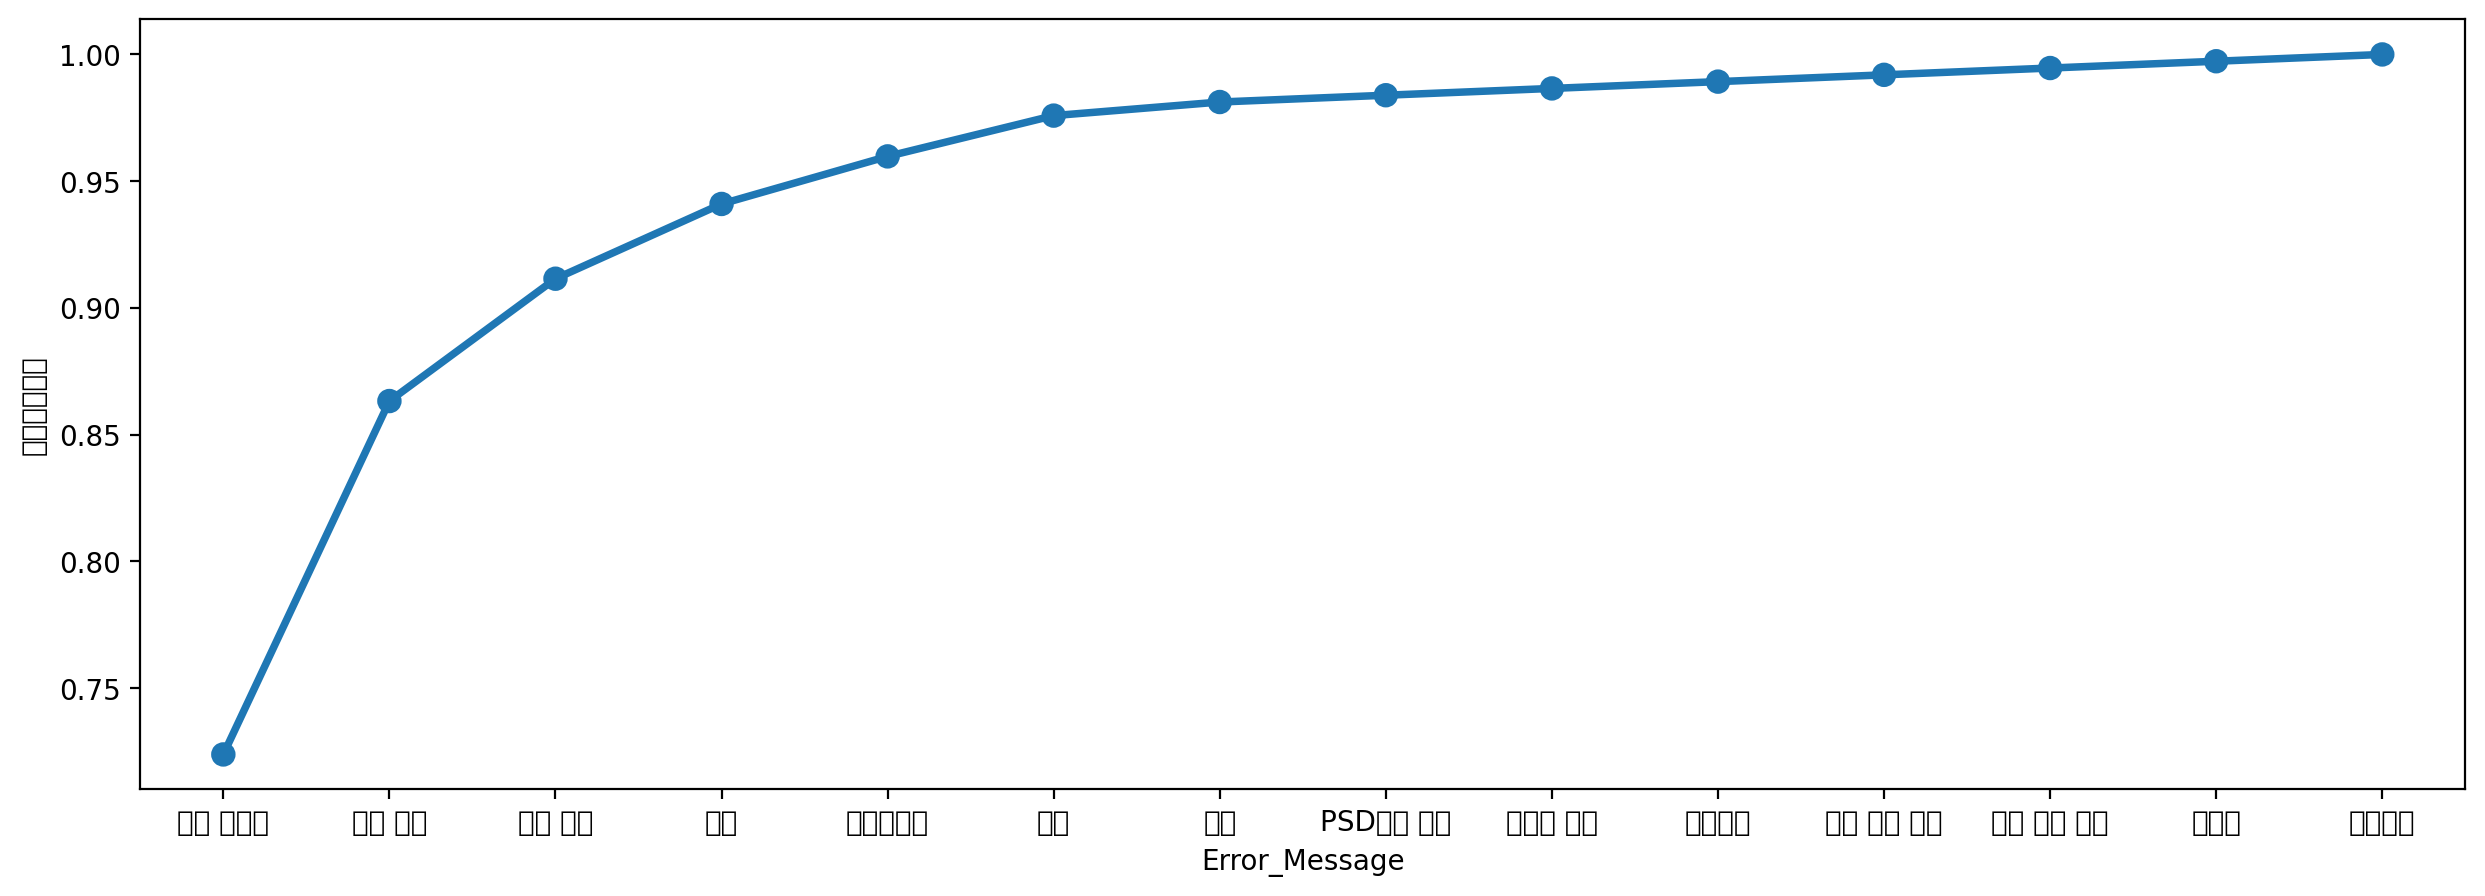

In [18]:
plt.figure(figsize=[15,5])
sns.pointplot(data=df_error_rice_pivot, x='Error_Message',y='누적발생비율')

<AxesSubplot:xlabel='Error_Message', ylabel='누적발생비율'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

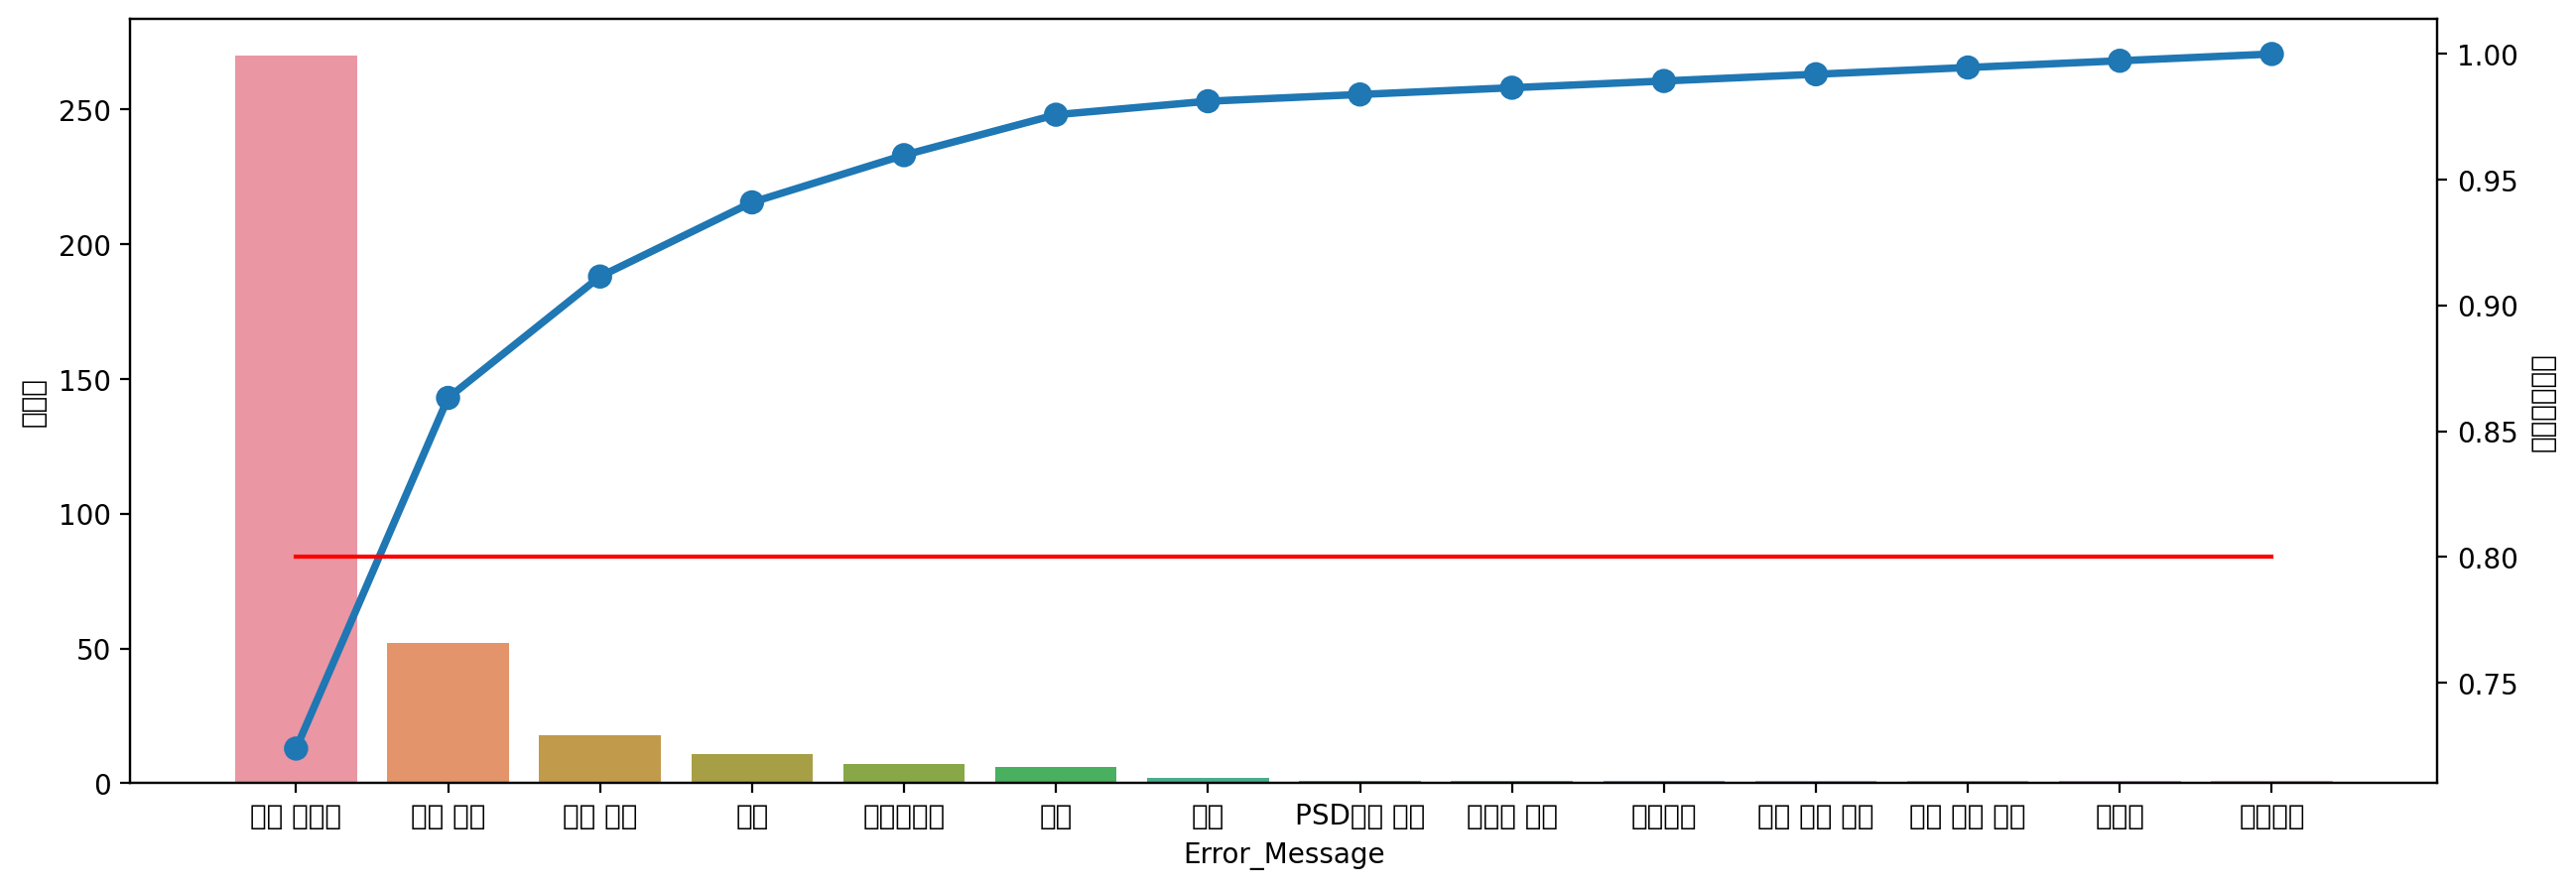

In [19]:
plt.figure(figsize=[15,5])
x1 = sns.barplot(data=df_error_rice_pivot, x='Error_Message',y='불량수') # y 축 범위 : 0~ 140
x2 = x1.twinx() # 서로 다른 스케일의 y축을 잡아주는 함수 
sns.pointplot(data=df_error_rice_pivot, x='Error_Message',y='누적발생비율') 
sns.lineplot(data=df_error_rice_pivot, x='Error_Message',y='Line', color='r')

In [20]:
df3_1 = df3.drop(columns=['순번', '생산라인코드', '생산라인명', '생산일자','품목코드','품목명'])

In [21]:
df3_process = pd.merge(df2, df3_1, how='left', on='ID')
df3_process.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자,ID,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,2021-01-03,2021-01-0323K01312C0013,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,2021-01-03,2021-01-0323V00019C0021,NaN,NaN,NaN,NaN,NaN,NaN
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,2021-01-03,2021-01-031.#JE+00C00313,NaN,NaN,NaN,NaN,NaN,NaN
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,2021-01-03,2021-01-0326A01006C0057,NaN,NaN,NaN,NaN,NaN,NaN
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40,2021-01-03,2021-01-0326B06024C0072,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cond1 = (df3_process['Error_Message'].isnull())
df3_process.loc[cond1, 'Target']= 0
df3_process.loc[~cond1, 'Target']= 1

df3_process['Target'].value_counts() # 불량 여부 

0.0    22946
1.0     1150
Name: Target, dtype: int64

In [23]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '볶음밥' in row:
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '취나물밥' in row :
        return 'rice'
    elif '곤드레밥' in row :
        return 'rice'
    else:
        return 'ect'
    
df3_process['구분'] = df3_process['품목명'].apply(func1)
df3_process['구분'].value_counts()

ect     15372
rice     8629
Name: 구분, dtype: int64

In [24]:
cond1 = (df3_process['구분']=='rice')
df3_process_rice = df3_process.loc[cond1]
df3_process_rice.head(3)

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산일자,ID,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,Target,구분
6607,1,C010,파일롯,21501104,조미액-게살볶음밥(재),W003,71.830523,87.230523,122.671673,23.627,...,2016-04-10,2016-04-1021501104C0101,NaN,NaN,NaN,NaN,NaN,NaN,0.0,rice
6626,6,C001,쿠커 #1,21501104,조미액-게살볶음밥(재),W003,71.285980,93.785980,129.305030,23.679,...,2016-04-29,2016-04-2921501104C0016,NaN,NaN,NaN,NaN,NaN,NaN,0.0,rice
6667,1,C001,쿠커 #1,21501106,조미액-새우볶음밥(재),W003,72.170049,92.270049,128.273049,24.002,...,2016-06-05,2016-06-0521501106C0011,NaN,NaN,NaN,NaN,NaN,NaN,0.0,rice


<AxesSubplot:xlabel='Target', ylabel='충전실온도'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

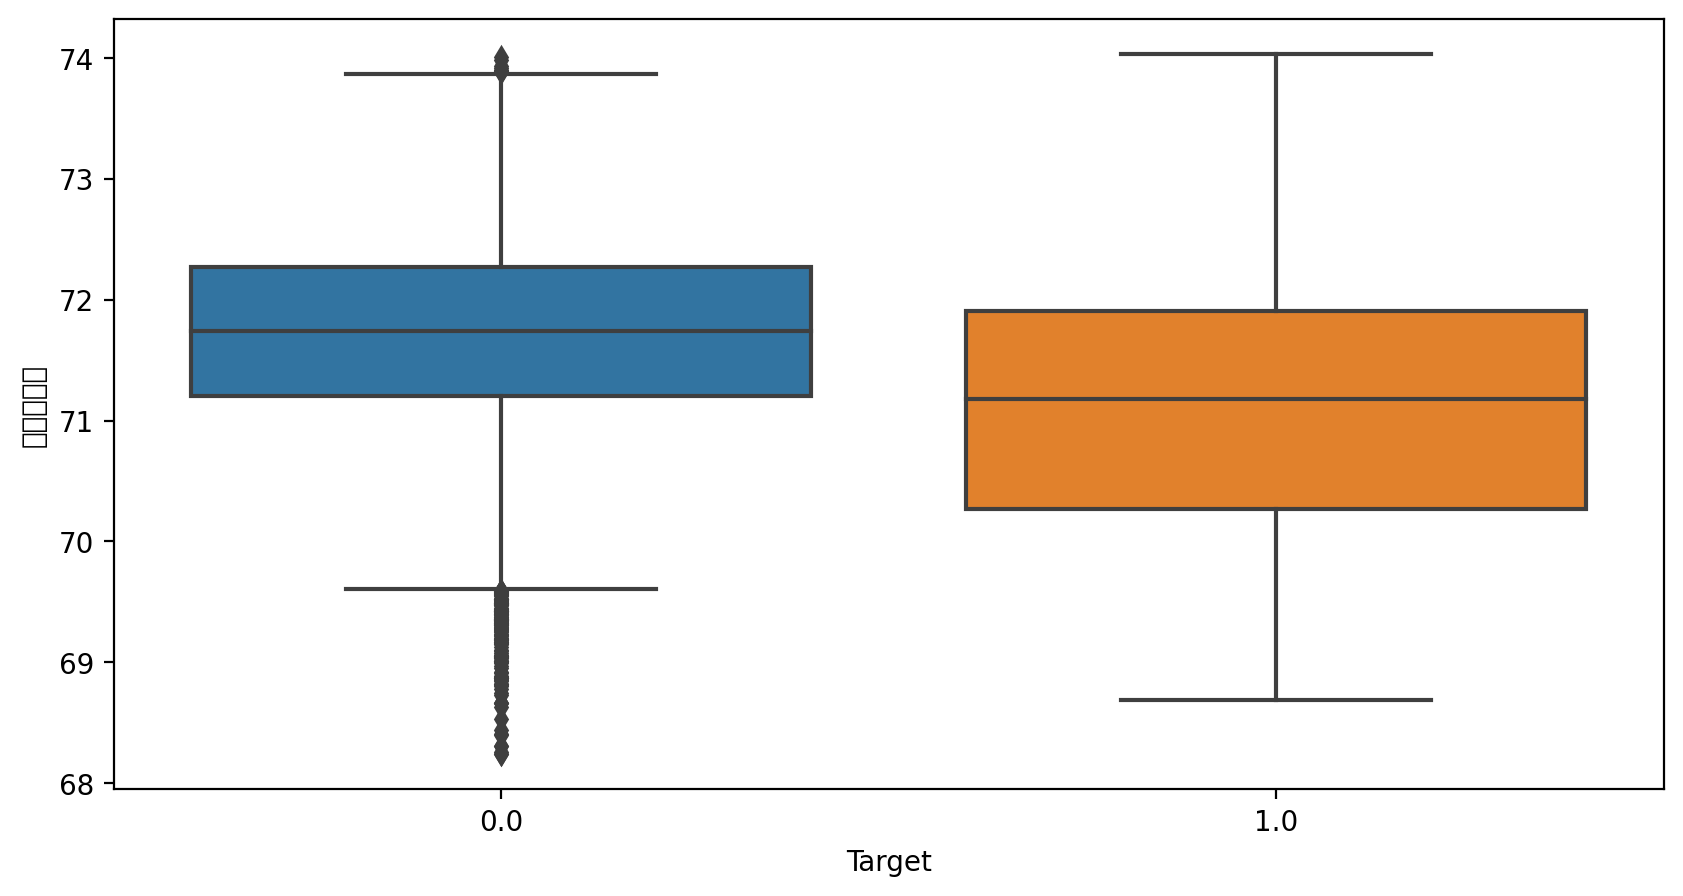

In [25]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='충전실온도')

<AxesSubplot:xlabel='Target', ylabel='실링온도'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


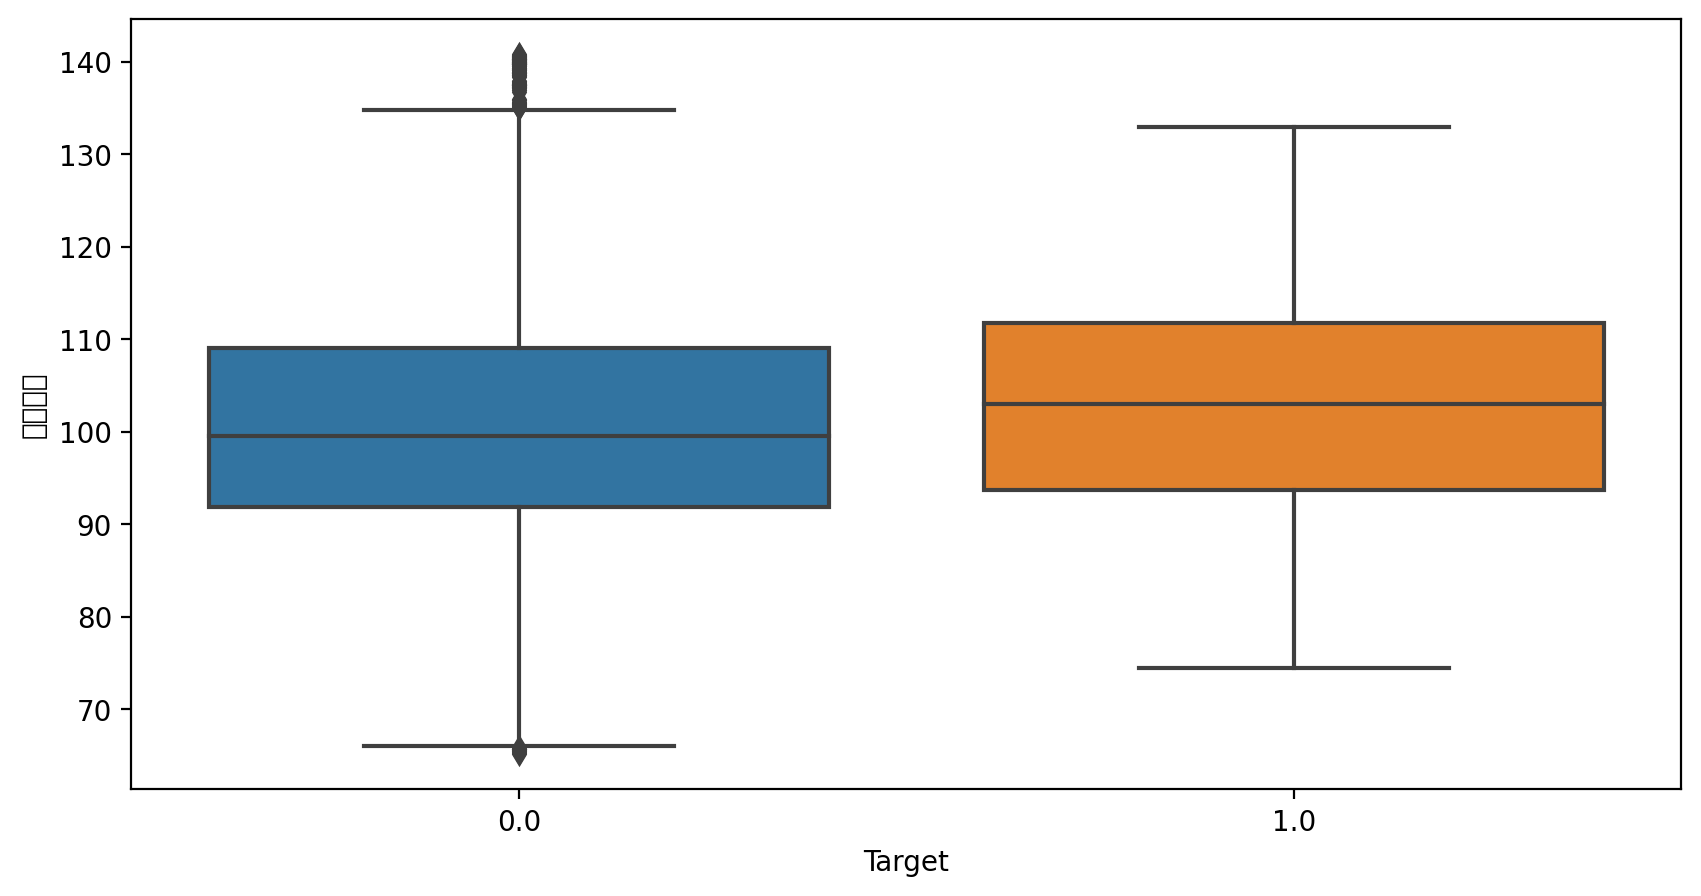

In [26]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='실링온도')

<AxesSubplot:xlabel='Target', ylabel='쿠킹온도'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


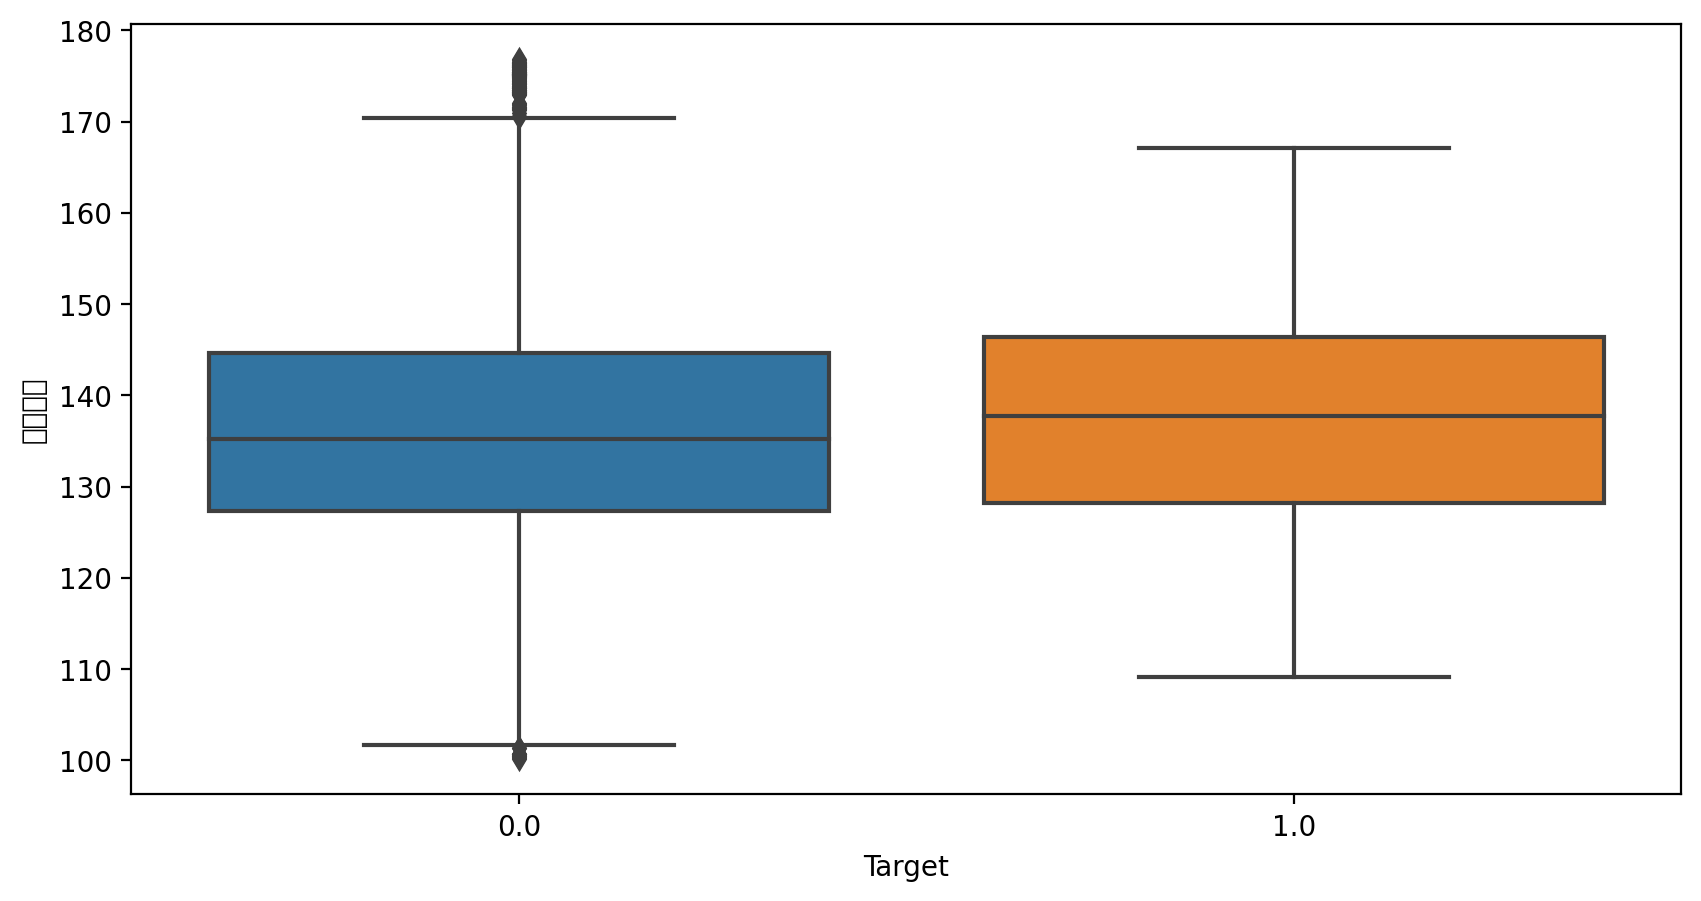

In [27]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='쿠킹온도')

<AxesSubplot:xlabel='Target', ylabel='쿠킹스팀압력'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54016 (\N{HANGUL SYLLABLE TIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **

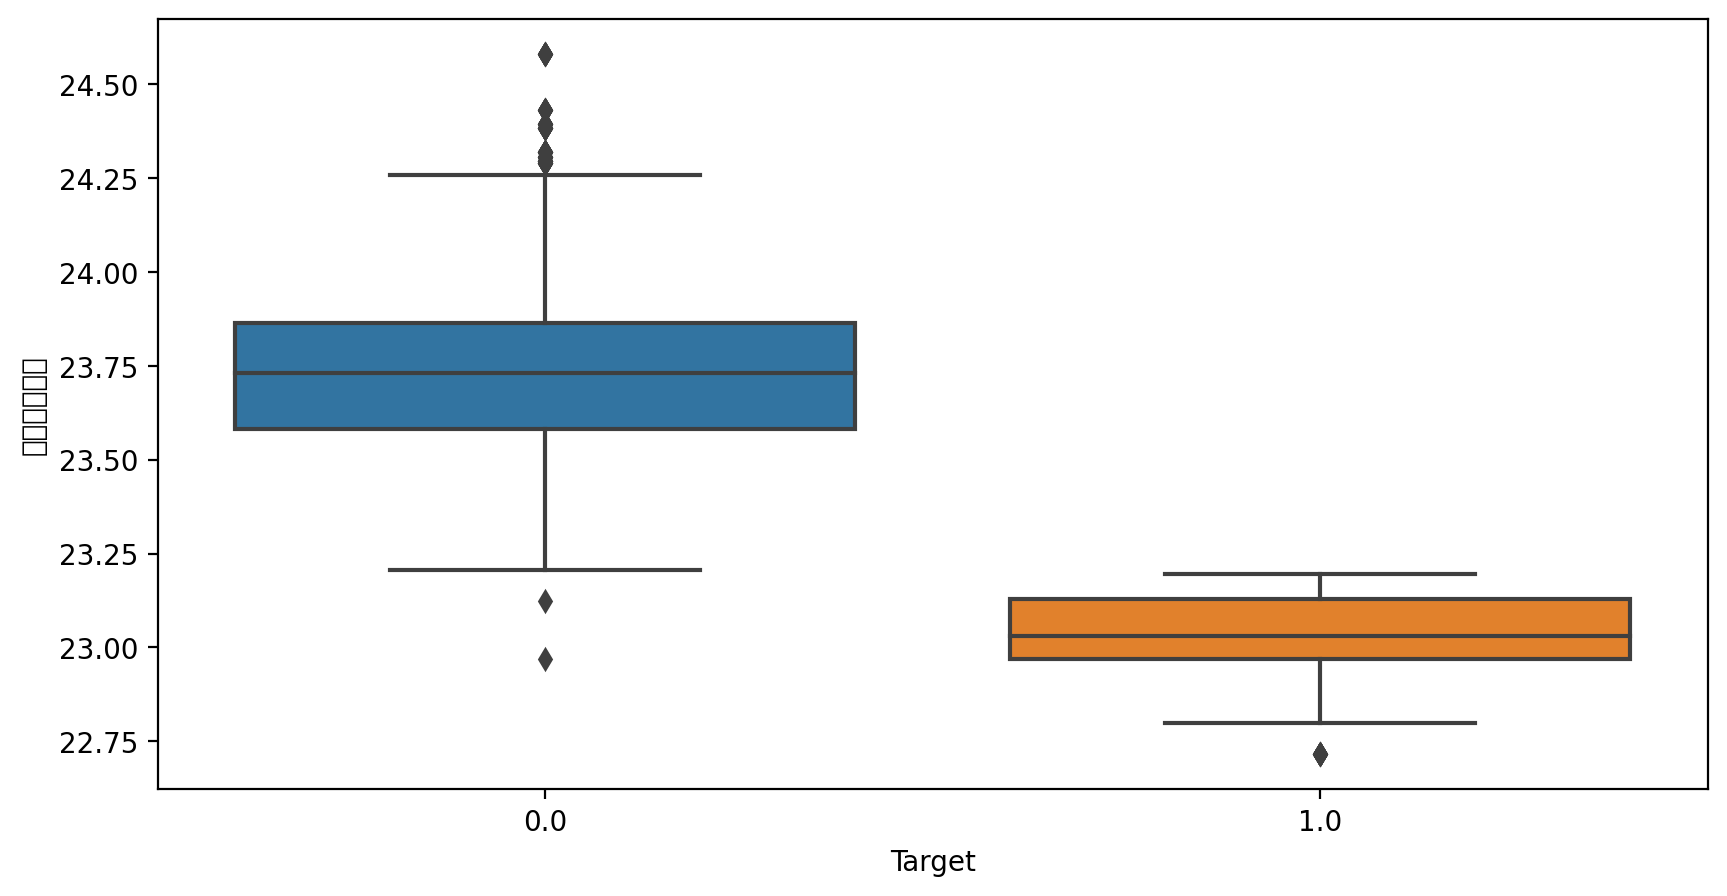

In [28]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='쿠킹스팀압력')

<AxesSubplot:xlabel='Target', ylabel='실링압력'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


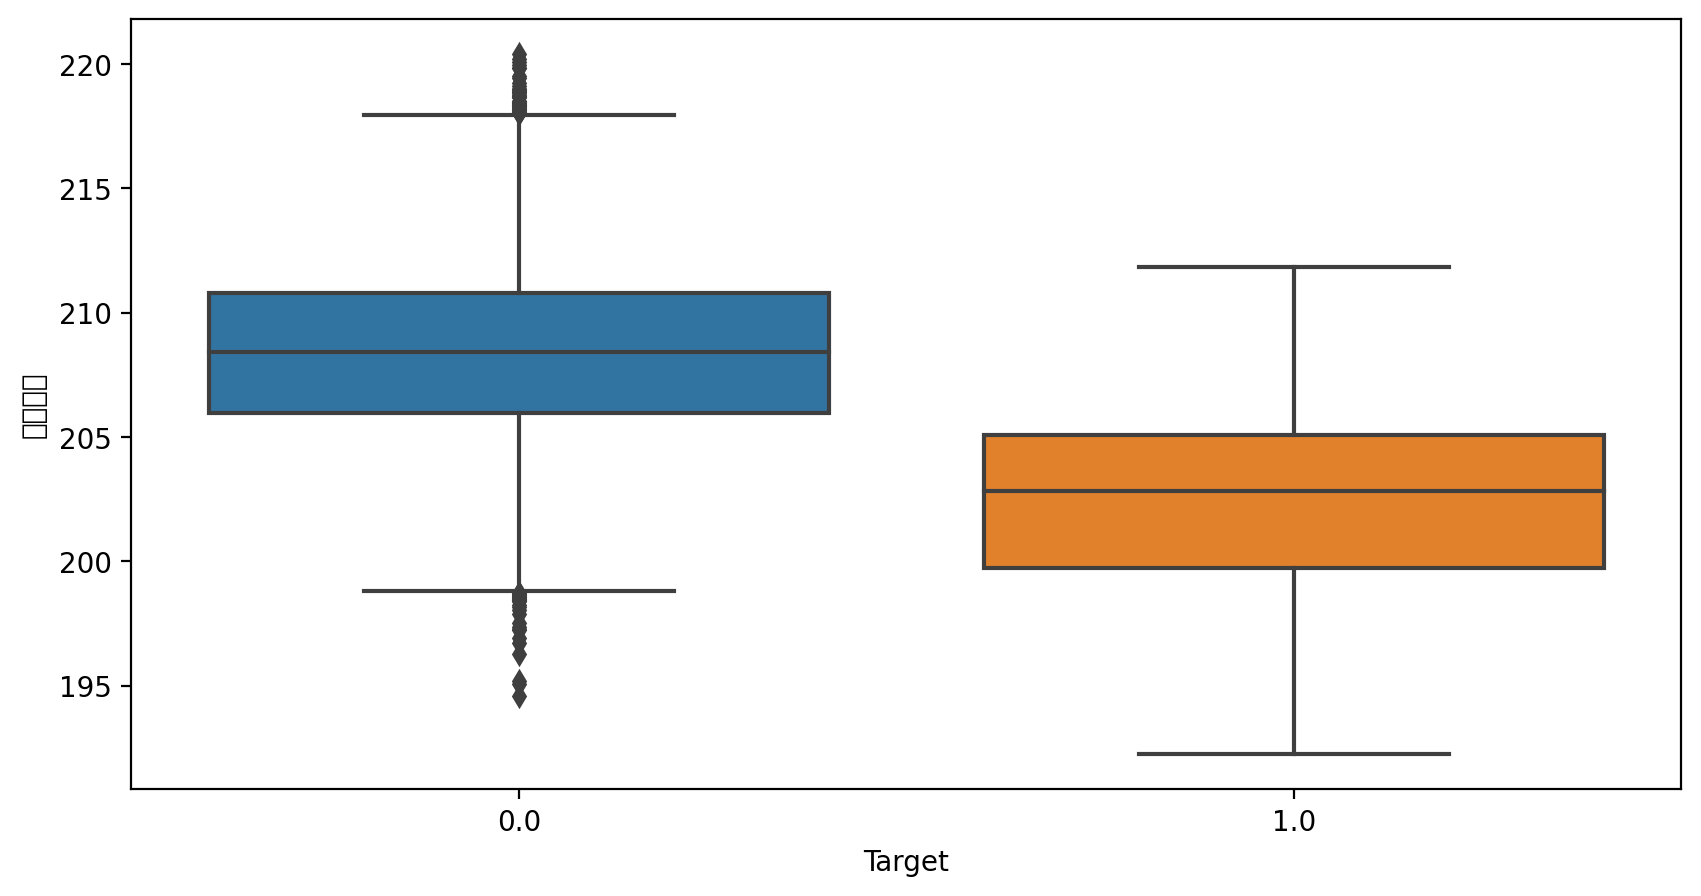

In [29]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='실링압력')

<AxesSubplot:xlabel='Target', ylabel='생산시간'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


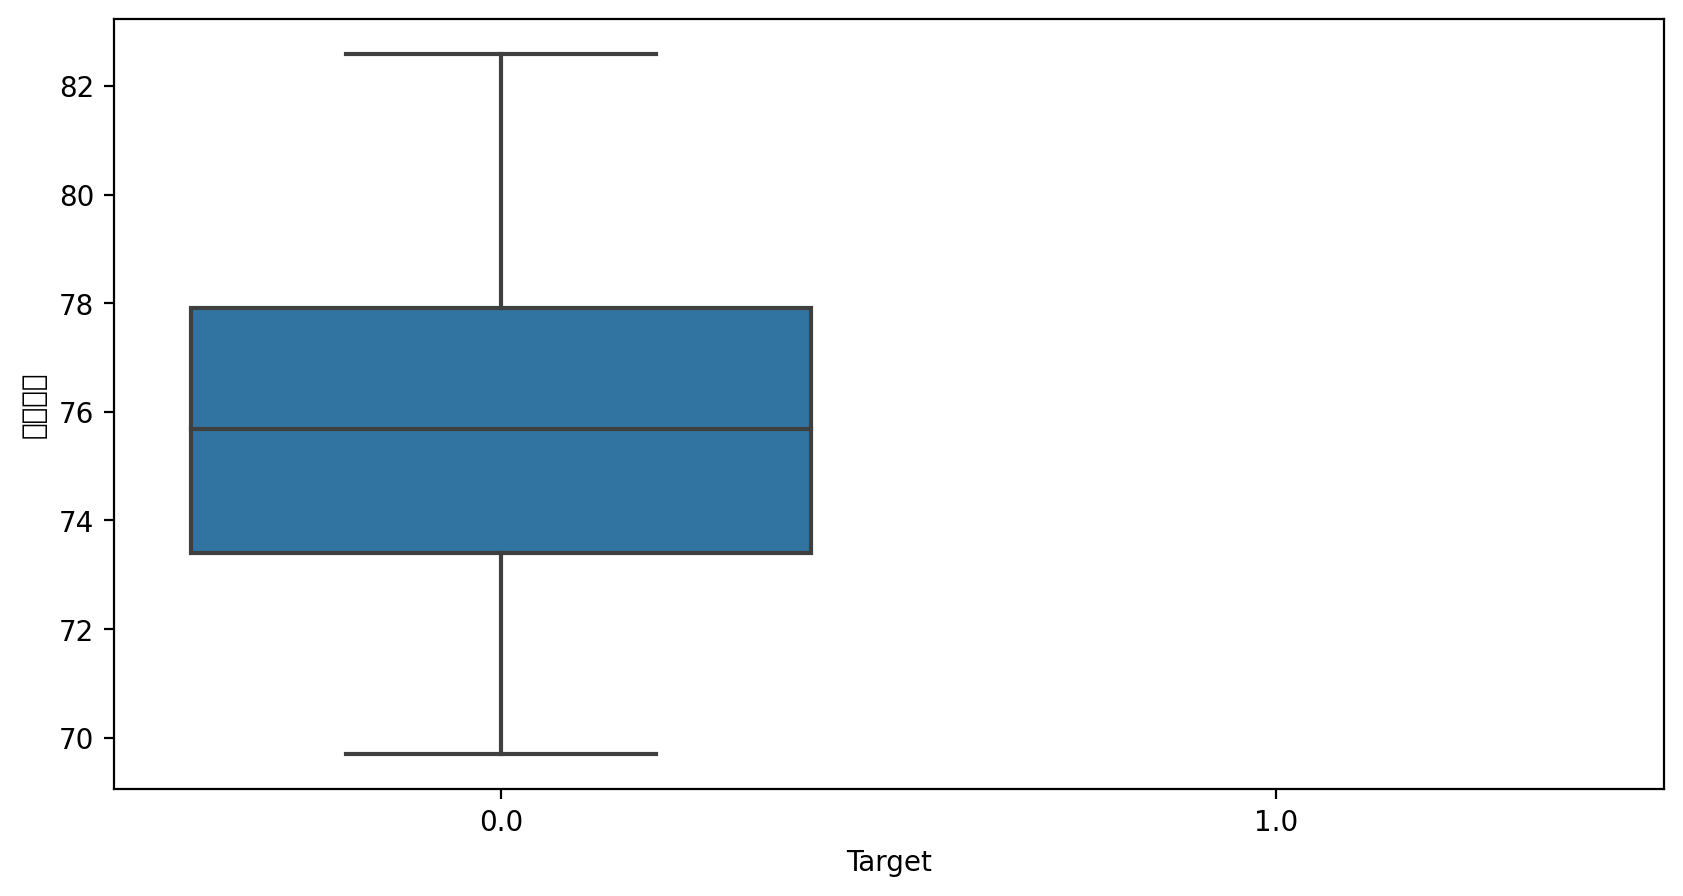

In [30]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df3_process_rice, x='Target', y='생산시간')

In [35]:
stats.normaltest(df3_process_rice['실링압력']) 

NormaltestResult(statistic=25.61949862601147, pvalue=2.733987715227238e-06)

In [36]:
stats.normaltest(df3_process_rice['쿠킹스팀압력'])

NormaltestResult(statistic=284.2100627823364, pvalue=1.9256130305328622e-62)

In [37]:
stats.normaltest(df3_process_rice['충전실온도'])

NormaltestResult(statistic=289.22210045287665, pvalue=1.5711543943327137e-63)

 wilcoxon Test 검정 

In [39]:
cond1 = (df3_process_rice['Target']==1)

df3_process_rice_target = df3_process_rice.loc[cond1]
df3_process_rice_non_target = df3_process_rice.loc[~cond1]

In [40]:
# 귀무가설 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 것이다. 
stats.ranksums(df3_process_rice_target['실링압력'], df3_process_rice_non_target['실링압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=-24.50999566390155, pvalue=1.1557603474660893e-132)

In [41]:
# 귀무가설 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 것이다. 
stats.ranksums(df3_process_rice_target['쿠킹스팀압력'], df3_process_rice_non_target['쿠킹스팀압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=-32.710402060597396, pvalue=1.1110364965217213e-234)

In [42]:
# 귀무가설 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 것이다. 
stats.ranksums(df3_process_rice_target['충전실온도'], df3_process_rice_non_target['쿠킹스팀압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=32.718583066323376, pvalue=8.499364488183402e-235)

In [43]:
def control_chart(x_feature,n,m):
    USL = df3_process_rice[x_feature].mean() + (df3_process_rice[x_feature].std() * 3 )
    LSL = df3_process_rice[x_feature].mean() - (df3_process_rice[x_feature].std() * 3 )
    df3_process_rice_cc = df3_process_rice[[x_feature]].reset_index()
    
    df3_process_rice_cc['Center'] = df3_process_rice_cc[x_feature].mean()
    df3_process_rice_cc['USL'] = USL
    df3_process_rice_cc['LSL'] = LSL
    df3_process_rice_cc.head()
    
    input_data = df3_process_rice_cc.iloc[n:m]

    plt.figure(figsize=[15,5])
    sns.pointplot(data=input_data, x=input_data.index, y=x_feature)
    sns.lineplot(data=input_data, x=input_data.index, y='Center', color='b')
    sns.lineplot(data=input_data, x=input_data.index, y='USL', color='r')
    sns.lineplot(data=input_data, x=input_data.index, y='LSL', color='r')

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


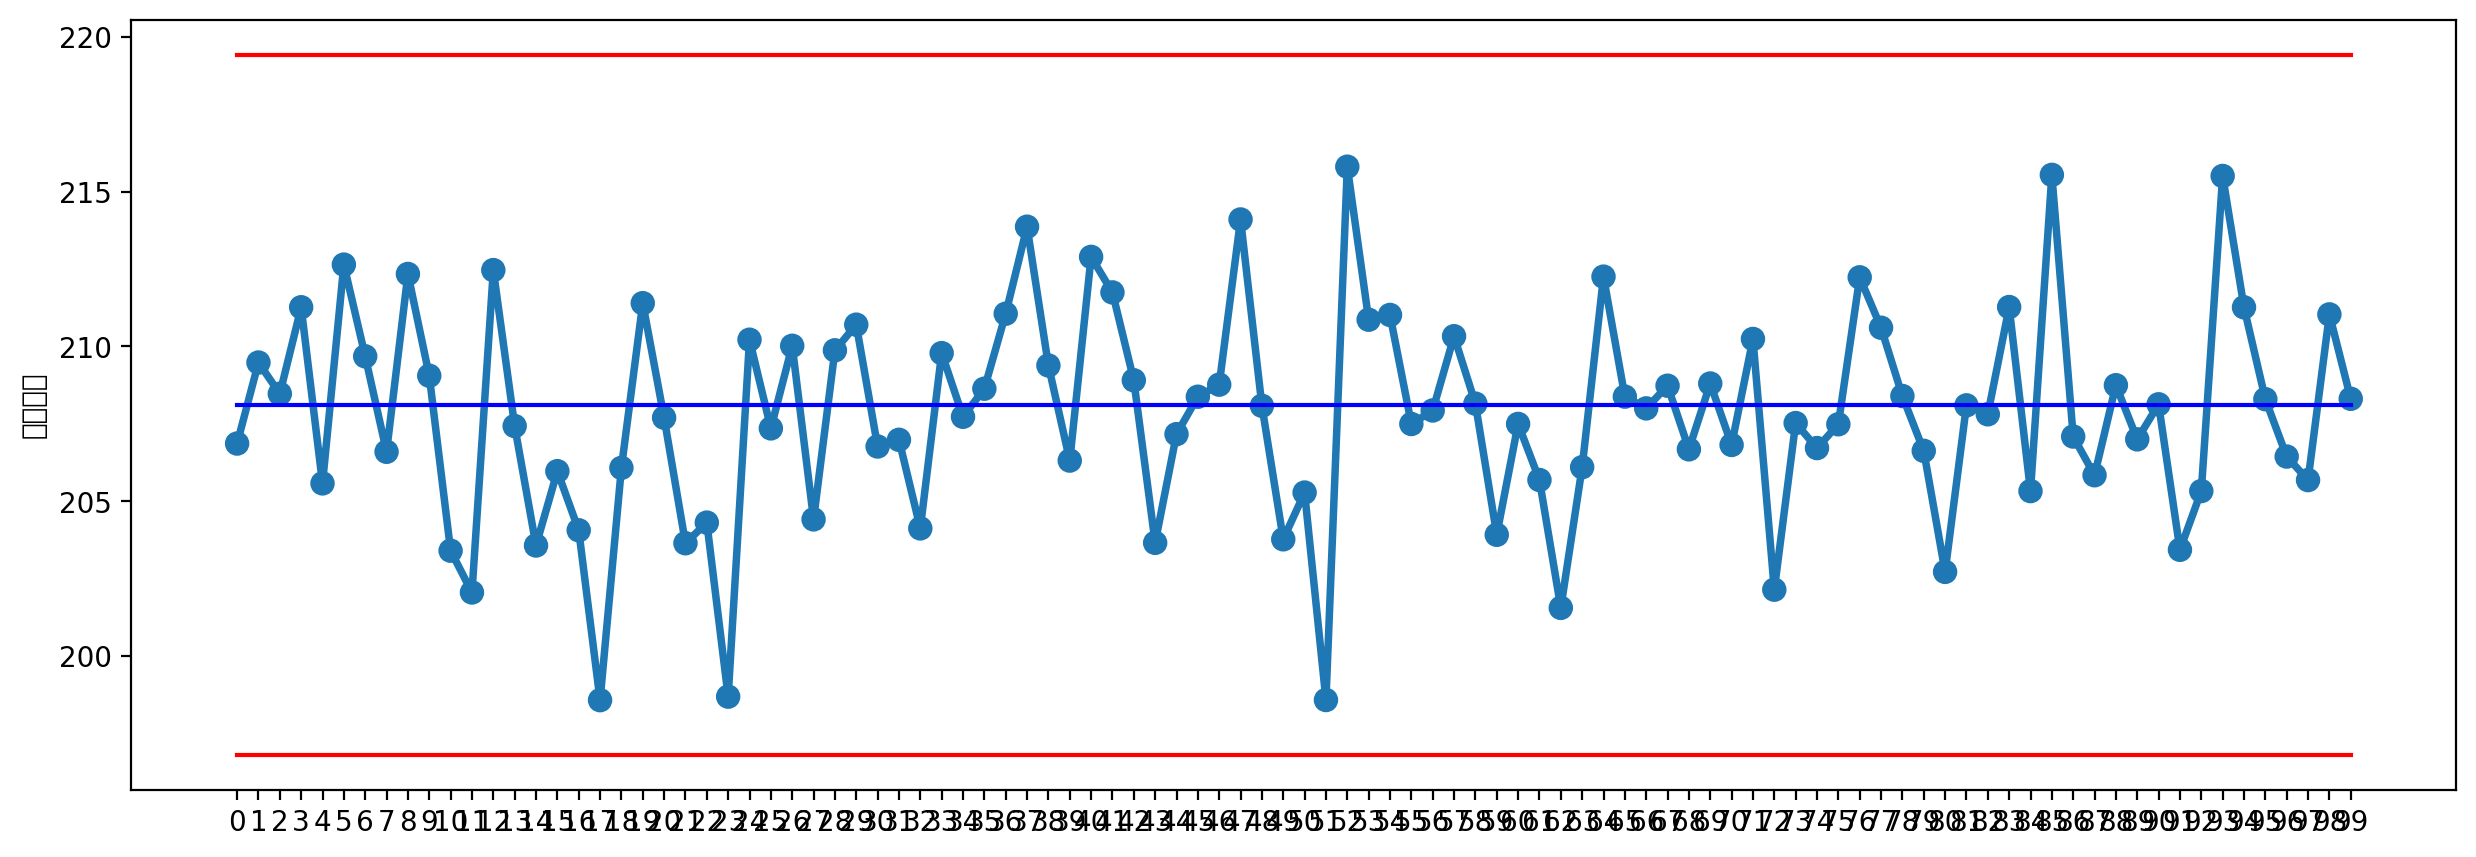

In [44]:
control_chart('실링압력',0,100)

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54016 (\N{HANGUL SYLLABLE TIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **

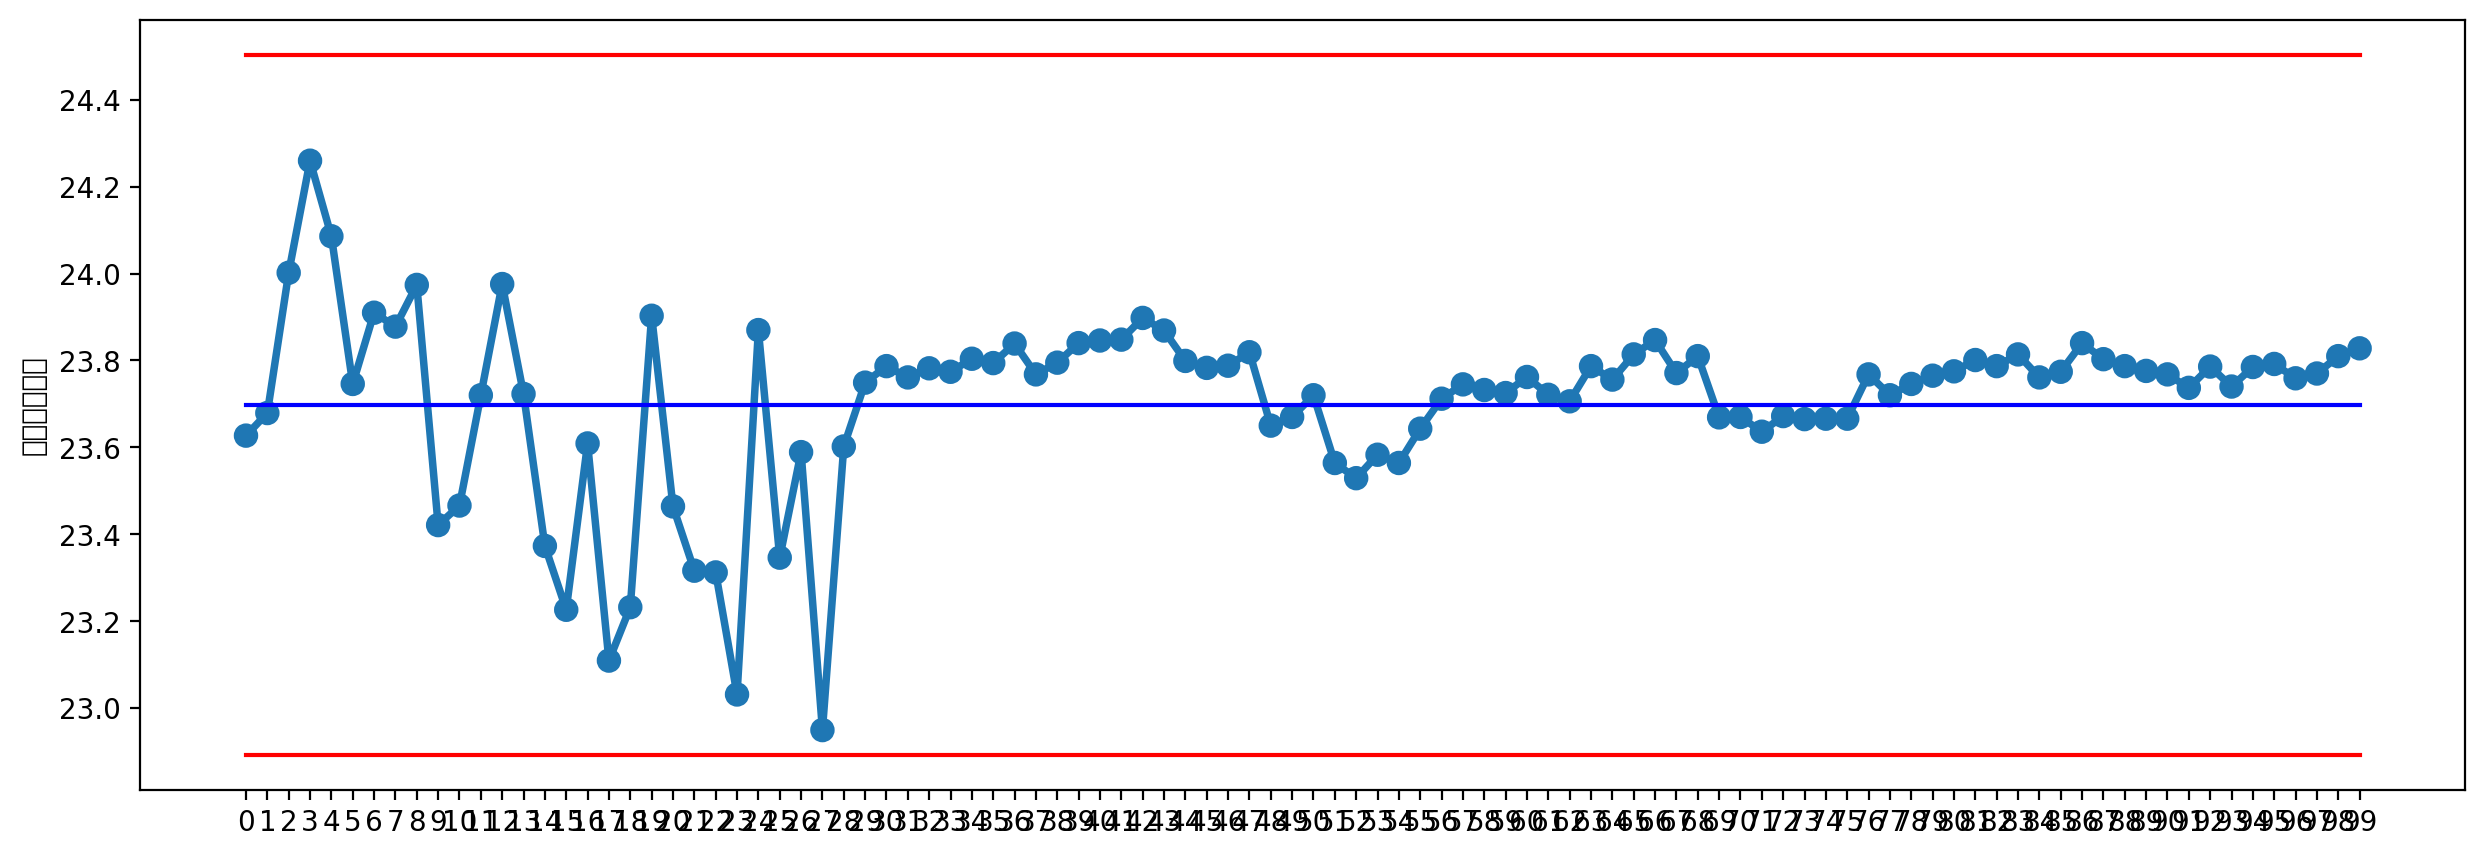

In [45]:
control_chart('쿠킹스팀압력',0,100)

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

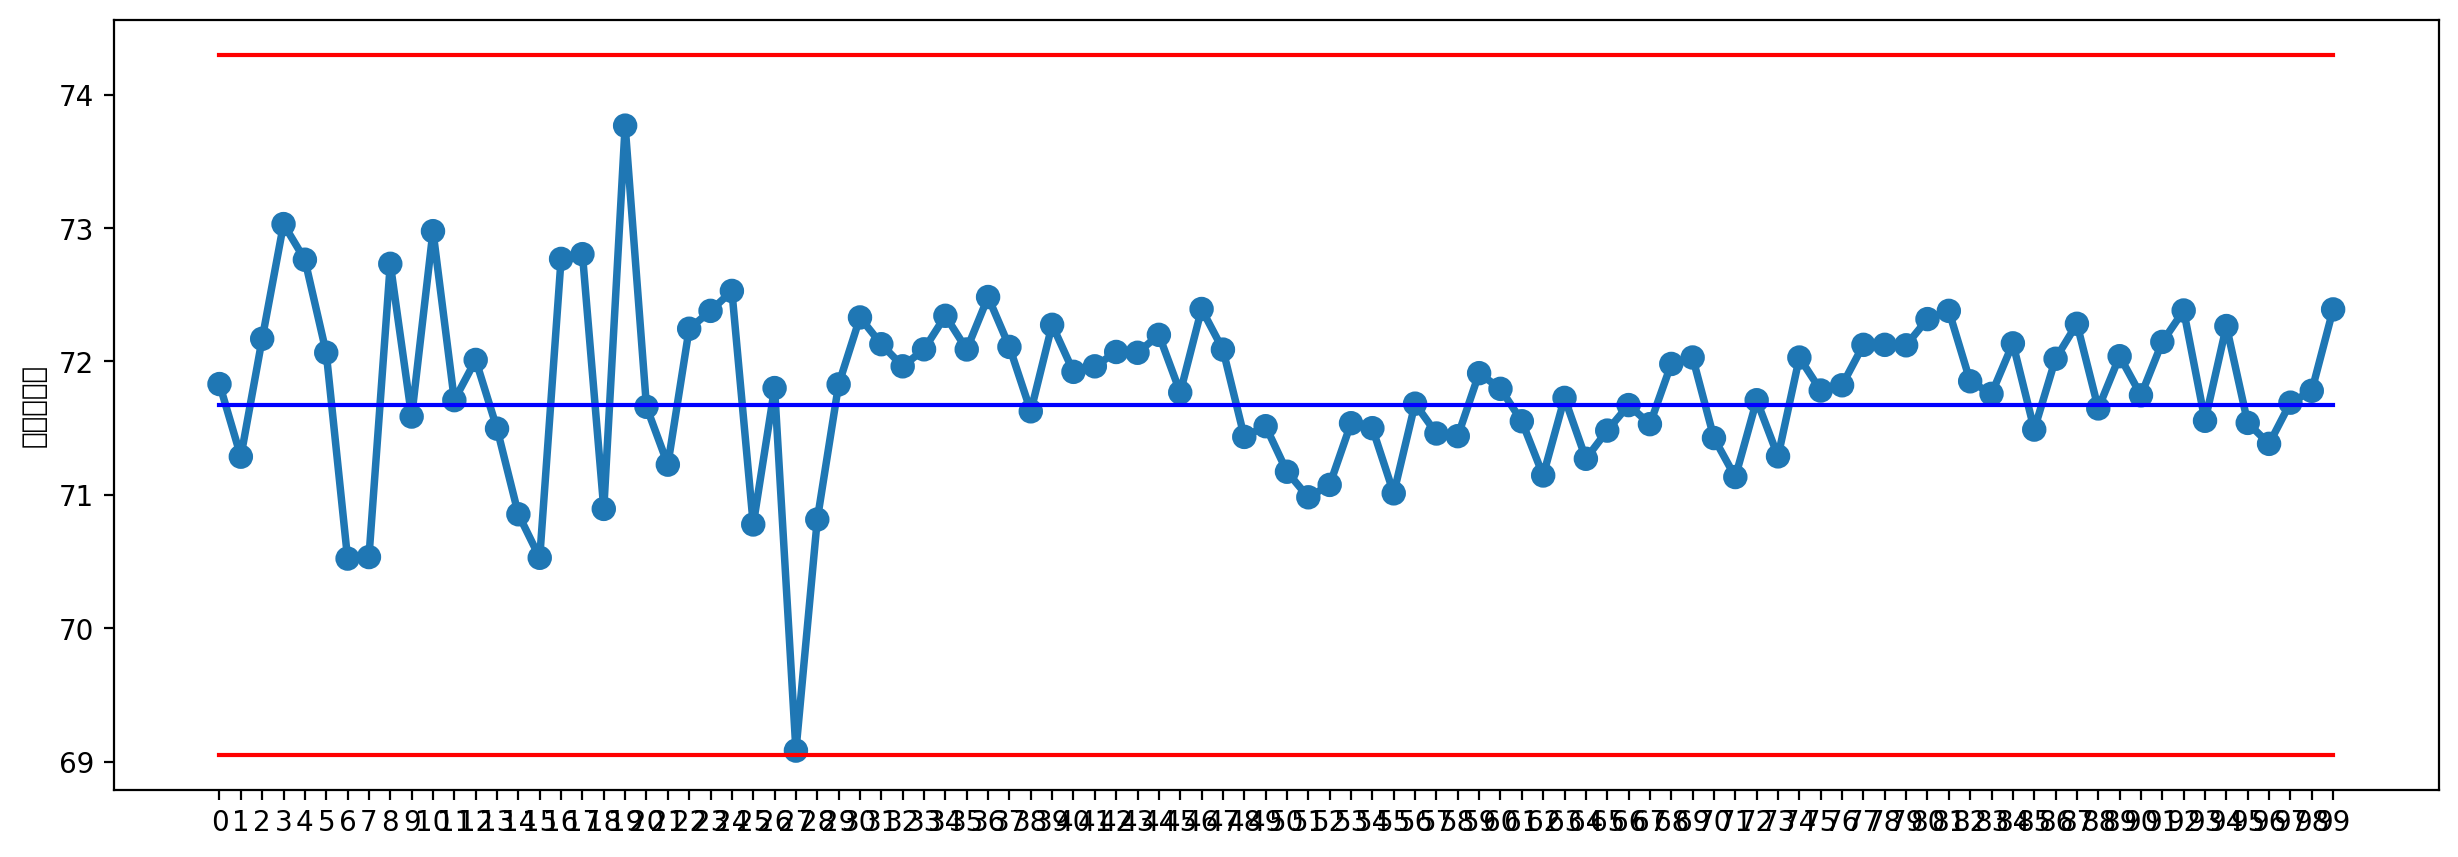

In [46]:
control_chart('충전실온도',0,100)